In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (10,8)

In [5]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
df.shape

(1000, 8)

In [9]:
df['mean_score'] = ((df['math score'] + df['reading score'] + df['writing score'])/3).round()
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
5,female,group B,associate's degree,standard,none,71,83,78,77.0
6,female,group B,some college,standard,completed,88,95,92,92.0
7,male,group B,some college,free/reduced,none,40,43,39,41.0
8,male,group D,high school,free/reduced,completed,64,64,67,65.0
9,female,group B,high school,free/reduced,none,38,60,50,49.0


In [10]:
df.gender.value_counts()

female    518
male      482
Name: gender, dtype: int64

In [11]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [12]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

### Label Encoding (converting data to numbers)

In [13]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['gender'] = lc.fit_transform(df['gender'])
df['race/ethnicity'] = lc.fit_transform(df['race/ethnicity'])
df['parental level of education'] = lc.fit_transform(df['parental level of education'])
df['lunch'] = lc.fit_transform(df['lunch'])
df['test preparation course'] = lc.fit_transform(df['test preparation course'])
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean_score
0,0,1,1,1,1,72,72,74,73.0
1,0,2,4,1,0,69,90,88,82.0
2,0,1,3,1,1,90,95,93,93.0
3,1,0,0,0,1,47,57,44,49.0
4,1,2,4,1,1,76,78,75,76.0
5,0,1,0,1,1,71,83,78,77.0
6,0,1,4,1,0,88,95,92,92.0
7,1,1,4,0,1,40,43,39,41.0
8,1,3,2,0,0,64,64,67,65.0
9,0,1,2,0,1,38,60,50,49.0


In [14]:
# df = df.drop(['parental level of education\t','test preparation course\t'],axis=1)
# df.head(10)

### Analysing relation b/w gender and race

Text(0.5, 1.0, 'relation b/w gender and race')

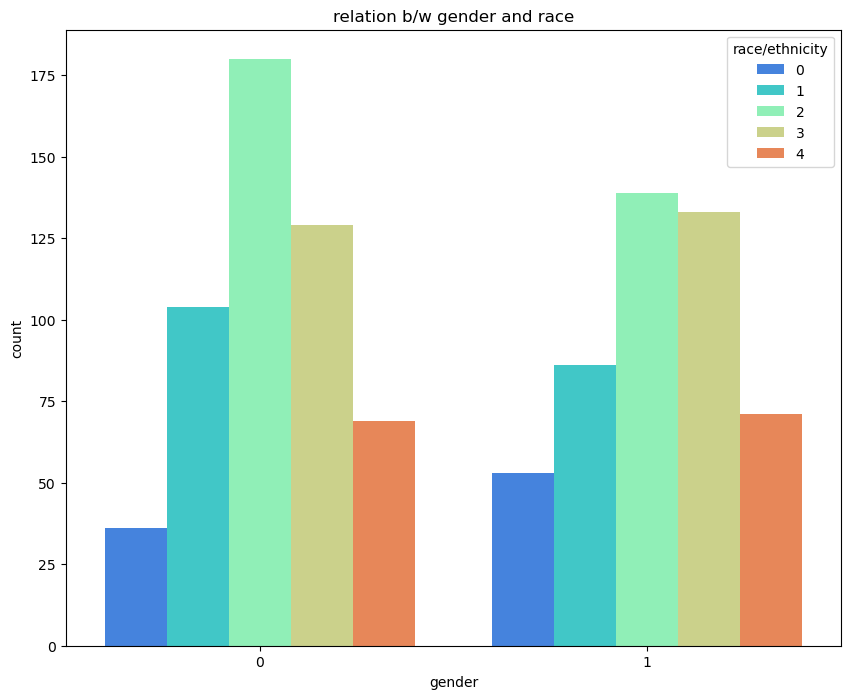

In [15]:
sns.countplot(x = df['gender'],data = df,hue = df['race/ethnicity'],palette = 'rainbow')
plt.title('relation b/w gender and race')

## Analysing test prepration course

In [16]:
df['test preparation course'].value_counts()
# 0 = compleeted
# 1 = not completed

1    642
0    358
Name: test preparation course, dtype: int64

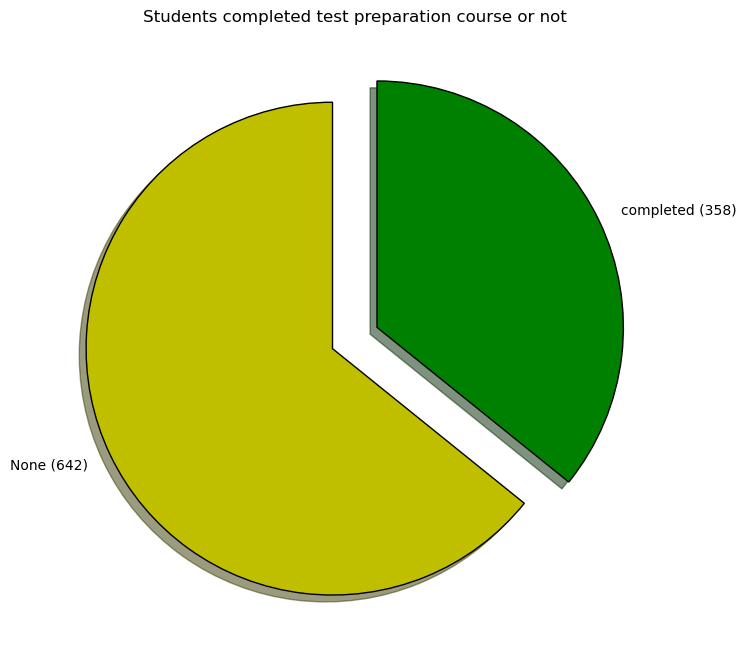

In [17]:
labels = ['None (642)', 'completed (358)']
colors = ['y','g']
explode = [0.1,0.1]
plt.pie(df['test preparation course'].value_counts() , labels = labels, colors = colors,explode = explode, shadow=True, startangle=90,wedgeprops = {'edgecolor':'black','linewidth':1})
plt.title('Students completed test preparation course or not')
plt.Legend=True

Text(0.5, 1.0, 'relation b/w test preparation course and mean_score')

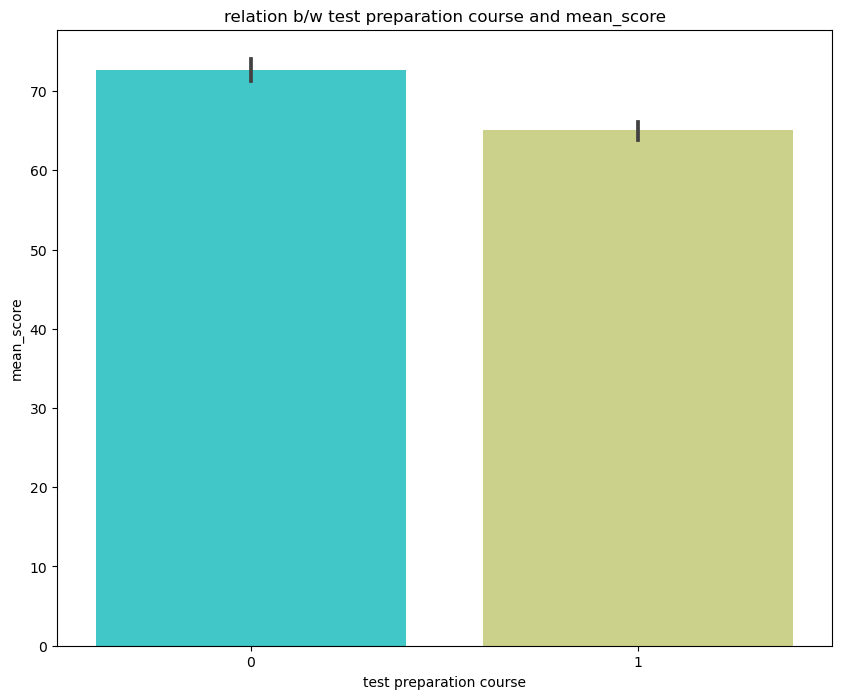

In [18]:
sns.barplot(x = df['test preparation course'],data = df,y = df['mean_score'],palette = 'rainbow')
plt.title('relation b/w test preparation course and mean_score')

## Analysing Lunch

<Axes: xlabel='lunch', ylabel='mean_score'>

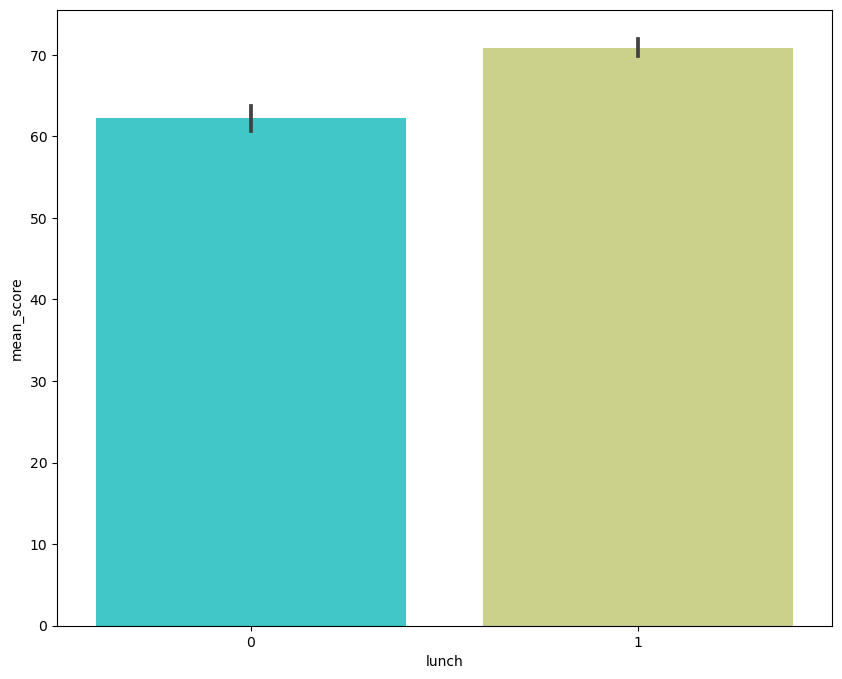

In [19]:
# 0 = school free lunch
# 1 = own
sns.barplot(x = df['lunch'],data = df,y = df['mean_score'],palette = 'rainbow')

<Axes: xlabel='parental level of education', ylabel='mean_score'>

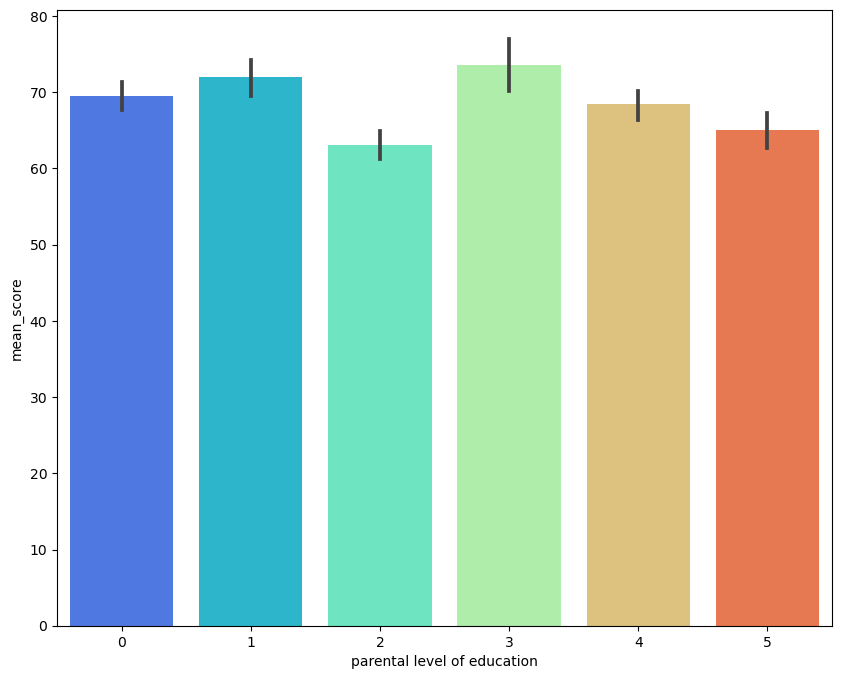

In [20]:
sns.barplot(x = df['parental level of education'],data = df,y = df['mean_score'],palette = 'rainbow')

<Figure size 1500x1000 with 0 Axes>

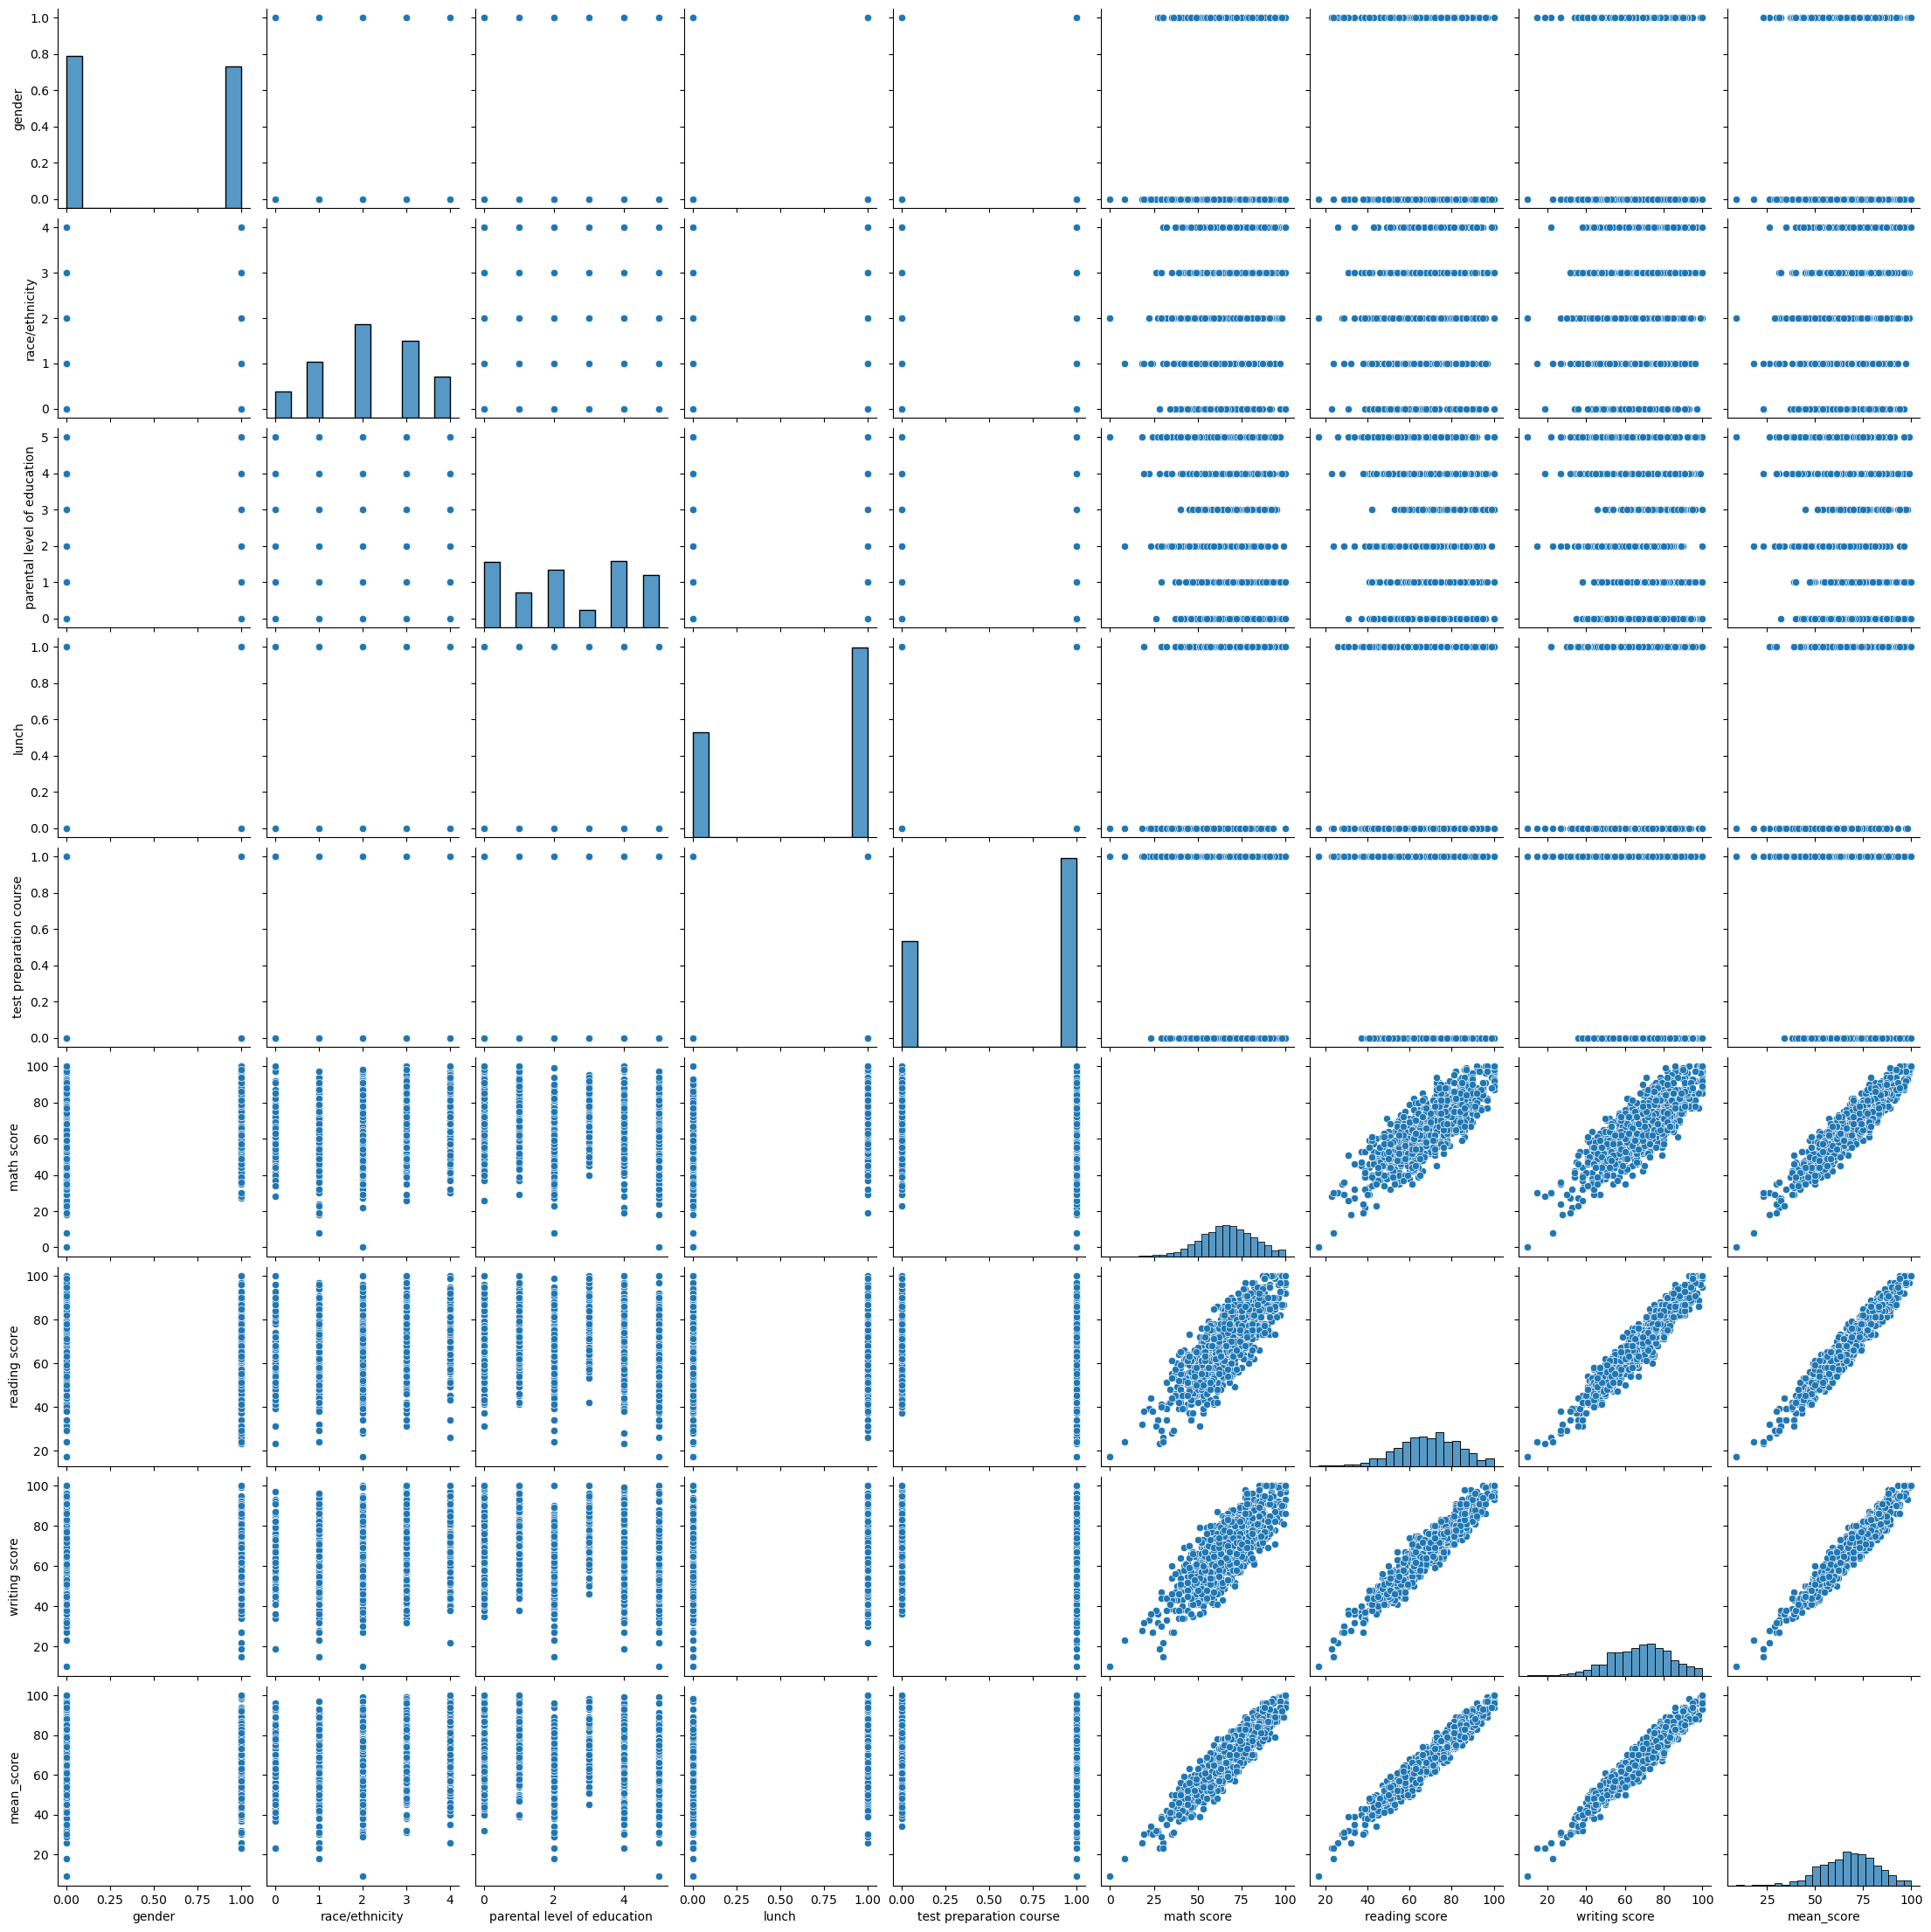

In [21]:
plt.figure(figsize = (15,10))
sns.pairplot(df)

<Axes: >

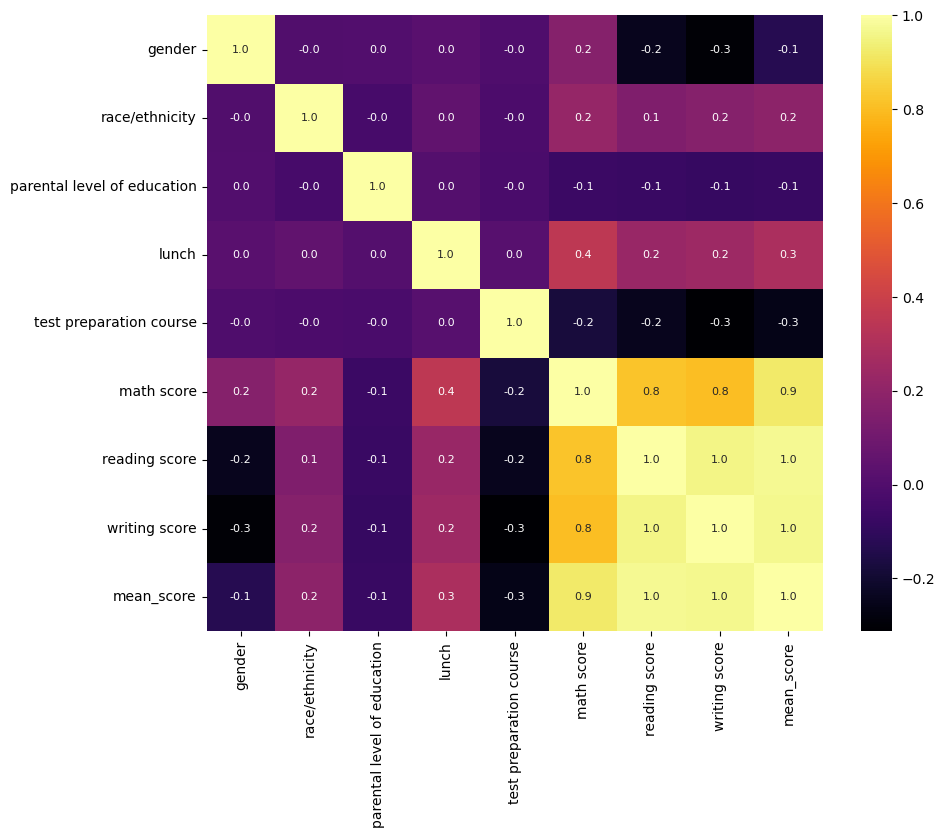

In [22]:
sns.heatmap(df.corr(),annot=True,annot_kws={'size':8},square=True,cbar=True,cmap="inferno",fmt='.1f')

## Data processing

In [23]:
df = df.drop(['math score','reading score','writing score'],axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mean_score
0,0,1,1,1,1,73.0
1,0,2,4,1,0,82.0
2,0,1,3,1,1,93.0
3,1,0,0,0,1,49.0
4,1,2,4,1,1,76.0


In [24]:
x = df.drop(['mean_score'],axis=1)
y = df['mean_score']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Model Bulding

In [26]:
from sklearn.linear_model import LogisticRegression

In [29]:
# logistic regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
prediction_score = lr.predict(x_test)
a = accuracy_score(y_test,prediction_score)
acc = a * 100
print('predicted accuracy score using Llris =', acc)

predicted accuracy score using Llris = 3.0


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.metrics import accuracy_score
pred = lr.predict(x_test)
accuracy_score(y_test, pred)

0.03

In [30]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_score = accuracy_score(y_test,dt.predict(x_test))
print('predicted accuracy score using LR is =',dt_score * 100)

predicted accuracy score using LR is = 3.0


In [31]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_score = accuracy_score(y_test, rf.predict(x_test))
print('predicted accuracy score using LR is =', rf_score * 100)

predicted accuracy score using LR is = 2.5
